Pangenome graph pipeline for Mycoplasma bovis genome, 
1)using three genomes or 27 genomes for grah construction 
2)use pgge to check which settting is the best for the 3 bovis graph
3)check the 3 genomes graph for variant among them, by vg deconstruct
4)index the 3 bovis graph
5)mapping NGS data to 3 bovis graph
6)genotyping variants based snarls in the graph for NGS samples or call novel variant in those NGS samples aganist to graph 

Mycoplasma_bovis_pangenome build from three genomes 

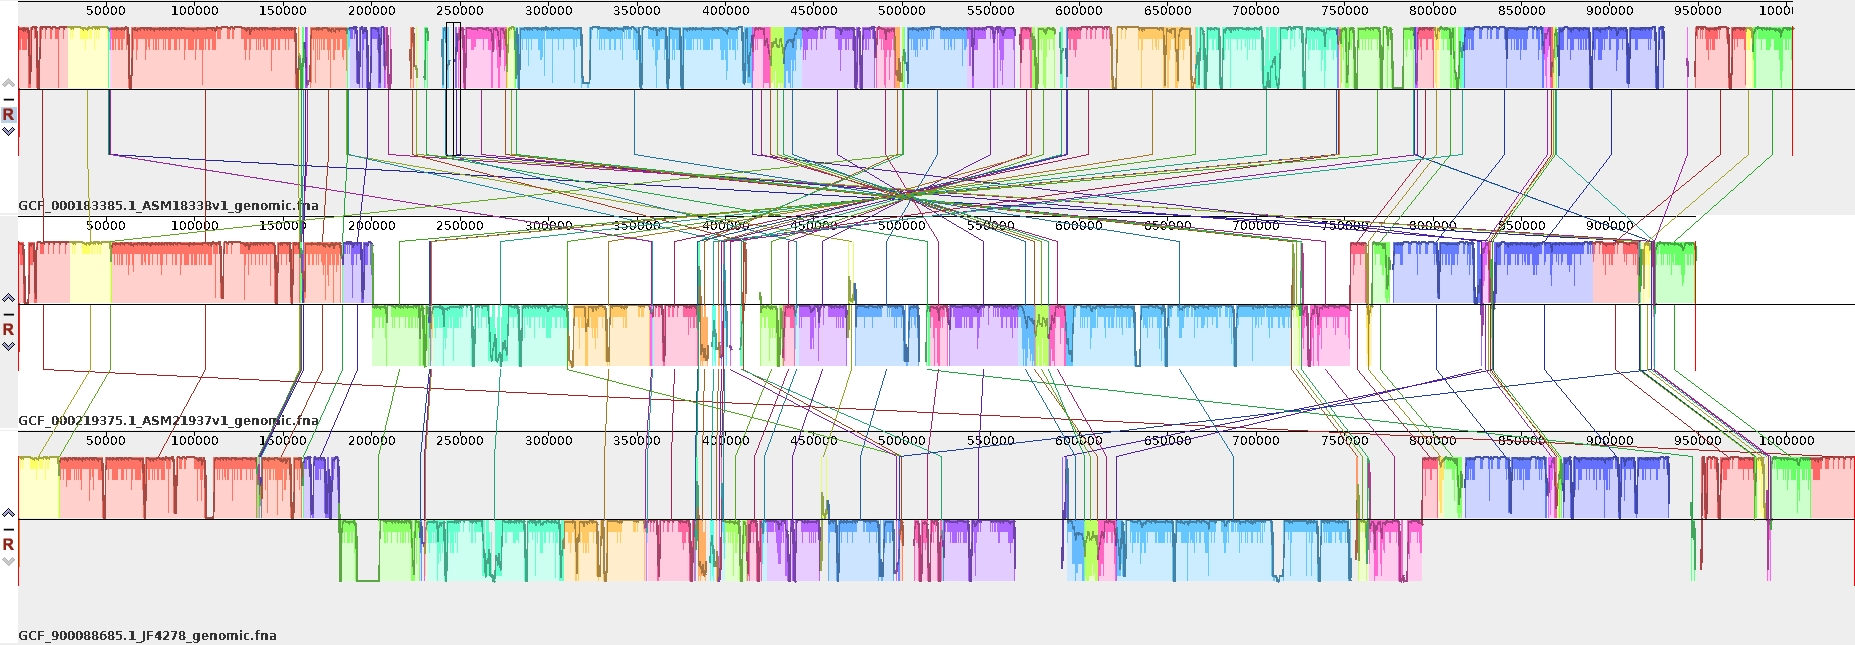

In [1]:
#check the genome alignment by Mauve
from IPython import display
display.Image("./3bovis.alignment.jpg")

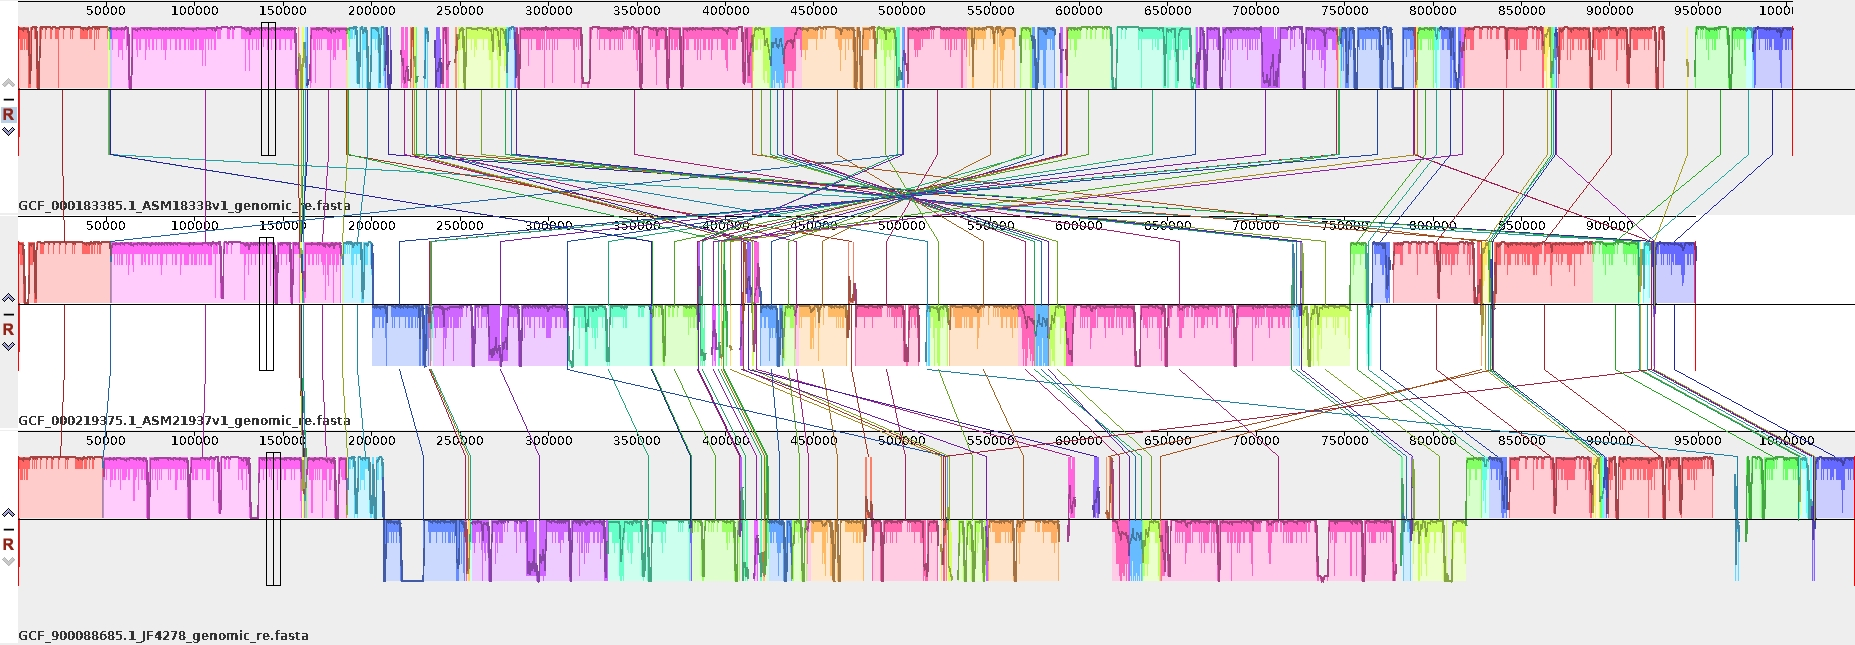

In [2]:
display.Image("./3bovis_restart.alignment.jpg")

In [6]:
!/opt/bioinf/samtools/1.9/bin/samtools faidx ./3bovis.fa

In [14]:
!/opt/bioinf/samtools/1.9/bin/samtools faidx ./3bovis_restart.fa

In [8]:
#Mash version 2.1 to calculate the distance for the genomes, which can be used as a guide for the similary -p for building the Pangenome graph
!/opt/bioinf/mash/mash-2.1/bin/mash triangle ./3bovis.fa

	3
NC_014760.1
NC_015725.1	0.017359
NZ_LT578453.1	0.0126347	0.00904645
Max p-value: 0


In [11]:
%cd ..

/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis


In [12]:
!/opt/bioinf/mash/mash-2.1/bin/mash triangle ./27bovies.fa

	27
ANC_014760.1
AP019558.1	0.0140492
CP068730.1	0.0126347	0.00808024
CP061874.1	0.0241368	0.0247621	0.0248413
CP092775.1	0.0130157	0.00888862	0.00314086	0.0243695
NC_015725.1	0.017359	0.00896738	0.0105261	0.0249208	0.00857671
NC_018077.1	0.0171265	0.00842259	0.0100623	0.0248413	0.00819369	0.000508006
NZ_CP005933.1	0.0174761	0.00904645	0.0105261	0.0250805	0.00857671	4.76906e-05	0.000557238
NZ_CP011348.1	0.0175939	0.00884936	0.010441	0.0247621	0.00846101	0.000385581	0.000264084	0.000434439
NZ_CP019639.1	0.0174761	0.00869309	0.0103562	0.0247621	0.00846101	0.000385581	0.000167546	0.000434439	0.000143503
NZ_CP023663.1	0.0171844	0.00869309	0.0104835	0.0251607	0.0083078	0.000830728	0.000312573	0.000880953	0.00058191	0.000483446
NZ_CP022586.1	0.00981378	0.0106545	0.0110444	0.0235265	0.0126347	0.015943	0.0157789	0.0160531	0.015943	0.0158882	0.0163307
NZ_CP022588.1	0.0149759	0.00873204	0.00715996	0.0248413	0.00399629	0.00480022	0.00451781	0.00486359	0.00467416	0.00454897	0.00461146	0.0136002
NZ

In [15]:
!/opt/bioinf/pggb/0.4.0/bin/pggb -i ./3bovis_restart.fa -s 1000 -p 95 -n 3 -t 48 -S -m -o 3bovis_restart_1k95 

[wfmash::map] Reference = [./3bovis_restart.fa]
[wfmash::map] Query = [./3bovis_restart.fa]
[wfmash::map] Kmer size = 19
[wfmash::map] Window size = 37
[wfmash::map] Segment length = 1000 (read split allowed)
[wfmash::map] Block length min = 5000
[wfmash::map] Chaining gap max = 100000
[wfmash::map] Percentage identity threshold = 95%
[wfmash::map] Skip self mappings
[wfmash::map] Mapping output file = 3bovis_restart_1k95/wfmash-ZtBpbp
[wfmash::map] Filter mode = 1 (1 = map, 2 = one-to-one, 3 = none)
[wfmash::map] Execution threads  = 48
[wfmash::skch::Sketch::build] minimizers picked from reference = 160456
[wfmash::skch::Sketch::index] unique minimizers = 65717
[wfmash::skch::Sketch::computeFreqHist] Frequency histogram of minimizers = (1, 17067) ... (40, 2)
[wfmash::skch::Sketch::computeFreqHist] With threshold 0.001%, consider all minimizers during lookup.
[wfmash::map] time spent computing the reference index: 0.40161 sec
[wfmash::skch::Map::mapQuery] mapped 100.00% @ 7.47e+05 bp/

In [16]:
!/opt/bioinf/pggb/0.4.0/bin/pggb -i ./3bovis_restart.fa -s 5000 -p 95 -n 3 -t 48 -S -m -o 3bovis_restart_5k95 

[wfmash::map] Reference = [./3bovis_restart.fa]
[wfmash::map] Query = [./3bovis_restart.fa]
[wfmash::map] Kmer size = 19
[wfmash::map] Window size = 188
[wfmash::map] Segment length = 5000 (read split allowed)
[wfmash::map] Block length min = 25000
[wfmash::map] Chaining gap max = 100000
[wfmash::map] Percentage identity threshold = 95%
[wfmash::map] Skip self mappings
[wfmash::map] Mapping output file = 3bovis_restart_5k95/wfmash-1Uc3eQ
[wfmash::map] Filter mode = 1 (1 = map, 2 = one-to-one, 3 = none)
[wfmash::map] Execution threads  = 48
[wfmash::skch::Sketch::build] minimizers picked from reference = 31498
[wfmash::skch::Sketch::index] unique minimizers = 12832
[wfmash::skch::Sketch::computeFreqHist] Frequency histogram of minimizers = (1, 3281) ... (40, 1)
[wfmash::skch::Sketch::computeFreqHist] With threshold 0.001%, consider all minimizers during lookup.
[wfmash::map] time spent computing the reference index: 0.274953 sec
[wfmash::skch::Map::mapQuery] mapped 100.00% @ 1.99e+06 bp

In [17]:
!/opt/bioinf/pggb/0.4.0/bin/pggb -i ./3bovis_restart.fa -s 10000 -p 95 -n 3 -t 48 -S -m -o 3bovis_restart_10k95 

[wfmash::map] Reference = [./3bovis_restart.fa]
[wfmash::map] Query = [./3bovis_restart.fa]
[wfmash::map] Kmer size = 19
[wfmash::map] Window size = 256
[wfmash::map] Segment length = 10000 (read split allowed)
[wfmash::map] Block length min = 50000
[wfmash::map] Chaining gap max = 100000
[wfmash::map] Percentage identity threshold = 95%
[wfmash::map] Skip self mappings
[wfmash::map] Mapping output file = 3bovis_restart_10k95/wfmash-dAfJxJ
[wfmash::map] Filter mode = 1 (1 = map, 2 = one-to-one, 3 = none)
[wfmash::map] Execution threads  = 48
[wfmash::skch::Sketch::build] minimizers picked from reference = 23044
[wfmash::skch::Sketch::index] unique minimizers = 9433
[wfmash::skch::Sketch::computeFreqHist] Frequency histogram of minimizers = (1, 2436) ... (36, 1)
[wfmash::skch::Sketch::computeFreqHist] With threshold 0.001%, consider all minimizers during lookup.
[wfmash::map] time spent computing the reference index: 0.258871 sec
[wfmash::skch::Map::mapQuery] mapped 100.00% @ 2.99e+06 b

In [19]:
!/opt/bioinf/pggb/0.4.0/bin/pggb -i ./3bovis_restart.fa -s 2000 -p 90 -n 3 -t 48 -S -m -o 3bovis_restart_2k90 

[wfmash::map] Reference = [./3bovis_restart.fa]
[wfmash::map] Query = [./3bovis_restart.fa]
[wfmash::map] Kmer size = 19
[wfmash::map] Window size = 54
[wfmash::map] Segment length = 2000 (read split allowed)
[wfmash::map] Block length min = 10000
[wfmash::map] Chaining gap max = 100000
[wfmash::map] Percentage identity threshold = 90%
[wfmash::map] Skip self mappings
[wfmash::map] Mapping output file = 3bovis_restart_2k90/wfmash-jcw6qp
[wfmash::map] Filter mode = 1 (1 = map, 2 = one-to-one, 3 = none)
[wfmash::map] Execution threads  = 48
[wfmash::skch::Sketch::build] minimizers picked from reference = 110171
[wfmash::skch::Sketch::index] unique minimizers = 45035
[wfmash::skch::Sketch::computeFreqHist] Frequency histogram of minimizers = (1, 11670) ... (40, 1)
[wfmash::skch::Sketch::computeFreqHist] With threshold 0.001%, consider all minimizers during lookup.
[wfmash::map] time spent computing the reference index: 0.38762 sec
[wfmash::skch::Map::mapQuery] mapped 100.00% @ 8.54e+05 bp

In [20]:
!/opt/bioinf/pggb/0.4.0/bin/pggb -i ./3bovis_restart.fa -s 20000 -p 95 -n 3 -t 48 -S -m -o 3bovis_restart_20k95 

[wfmash::map] Reference = [./3bovis_restart.fa]
[wfmash::map] Query = [./3bovis_restart.fa]
[wfmash::map] Kmer size = 19
[wfmash::map] Window size = 256
[wfmash::map] Segment length = 20000 (read split allowed)
[wfmash::map] Block length min = 100000
[wfmash::map] Chaining gap max = 100000
[wfmash::map] Percentage identity threshold = 95%
[wfmash::map] Skip self mappings
[wfmash::map] Mapping output file = 3bovis_restart_20k95/wfmash-GziSNr
[wfmash::map] Filter mode = 1 (1 = map, 2 = one-to-one, 3 = none)
[wfmash::map] Execution threads  = 48
[wfmash::skch::Sketch::build] minimizers picked from reference = 23044
[wfmash::skch::Sketch::index] unique minimizers = 9433
[wfmash::skch::Sketch::computeFreqHist] Frequency histogram of minimizers = (1, 2436) ... (36, 1)
[wfmash::skch::Sketch::computeFreqHist] With threshold 0.001%, consider all minimizers during lookup.
[wfmash::map] time spent computing the reference index: 0.265266 sec
[wfmash::skch::Map::mapQuery] mapped 100.00% @ 2.98e+06 

In [ ]:
!mkdir pgge 

In [22]:
!/opt/bioinf/pgge/20210412/bin/pgge

Mandatory arguments -g, -f, -r. If running in GAF-MODE, only -i, -r are required.
usage:    /usr/local/bin/pgge -g <input-gfa> -f <input-fasta> -r <beehave-r> [options]

GAF-MODE: /usr/local/bin/pgge -i <input-gaf> [options]

options:
   [evaluation]
    -g, --input-gfa FILE         input GFA file
    -f, --input-fasta FILE       input FASTA file (uncompressed or gzipped)
    -o, --output-dir FILE        output directory
    -r, --beehave-r PATH         path to beehave.R
    -b, --peanut-bed PATH        output BED file
    -n, --input-graph-names TSV  input graph name file: first row is the name of the original input file, second row is the display name in the PNG
    -v, --graphaligner-vg-mode   run GraphAligner with -x vg (default is -x dbg)
   [splitfa]
    -l, --seq-length N           length of the splits
    -s, --step N                 step size between splits
   [subsampling]
    -p, --subsample-percentage N length of the splits
    -u, --subsample-number N     step size between

In [24]:
!cat pgge_3bovis2.sh

#!/bin/bash

module load pgge/20210412
inputGFA=./pgge/*.gfa
input_folder=./pgge
inputfa=./3bovis_restart.fa
output=./pgge

for x in $inputGFA
do 
pgge -g $x -f $inputfa -o $output -r /home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pgge/scripts/beehave.R -b $output/pgge_3bovis_peanut_bed -l 100000 -s 5000 -t 16

done


In [34]:
!mkdir vg_deconstruct

In [25]:
%cd ./vg_deconstruct/

/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/vg_deconstruct


In [ ]:
!/opt/bioinf/vg/1.41.0/bin/vg deconstruct 

In [28]:
!/opt/bioinf/vg/1.41.0/bin/vg deconstruct -p NC_014760.1 -a -e -K  3bovis_restart1_1k95.gfa> 3bovis_restart1_1k95_aeK_path1.vcf

In [29]:
!/opt/bioinf/vg/1.41.0/bin/vg deconstruct -p NC_014760.1 -a -e -K  3bovis_restart2_5k95.gfa> 3bovis_restart2_5k95_aeK_path1.vcf

In [30]:
!/opt/bioinf/vg/1.41.0/bin/vg deconstruct -p NC_014760.1 -a -e -K  3bovis_restart3_10k95.gfa> 3bovis_restart3_10k95_aeK_path1.vcf

In [ ]:
!/opt/bioinf/vg/1.41.0/bin/vg deconstruct -p NC_014760.1 -a -e -K  3bovis_restart4_20k95.gfa> 3bovis_restart4_20k95_aeK_path1.vcf

In [ ]:
!/opt/bioinf/vg/1.41.0/bin/vg deconstruct -p NC_014760.1 -a -e -K  3bovis_restart5_2k90.gfa> 3bovis_restart5_2k90_aeK_path1.vcf

In [5]:
%cd build_index

/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/build_index


In [6]:
!/opt/bioinf/vg/1.41.0/bin/vg mod -X 256 3bovis_restart3_10k95.gfa >3bovis_restart3_10k95_256.vg

In [9]:
!/opt/bioinf/vg/1.41.0/bin/vg index -b ./tem_dir -t 48 -x 3bovis_restart3_10k95_256.xg -g 3bovis_restart3_10k95_256.gcsa -k 16 3bovis_restart3_10k95_256.vg

In [11]:
%cd ./../build_index/

/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/build_index


In [12]:
%cat index_3bovis_chopped.sh

#!/usr/bin/bash

module load vg/1.41.0 


vg mod -t 32 -X 256 3bovis_restart3_10k95.gfa > 3bovis_restart3_10k95_chopped.vg
vg index -t 46 -x 3bovis_restart3_10k95_chopped.xg 3bovis_restart3_10k95_chopped.vg
vg prune -t 48 -k 45 3bovis_restart3_10k95_chopped.vg >3bovis_restart3_10k95_pruned.vg
vg index -t 48 -b /tmp -p -x 3bovis_restart3_10k95_pruned.xg -g 3bovis_restart3_10k95_pruned.gcsa 3bovis_restart3_10k95_pruned.vg


#vg index -b ./temp -t 48 -p -x NM_26_2_restart_2_256.xg -g NM_26_2_restart_2_256.gcsa -k 16 NM_26_2_restart_2_256.vg






In [4]:
%cd ..

/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis


In [5]:
%cat 27bovis_1_10K0.95.sh

#!/bin/bash

module load pggb/0.4.0

input=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis

pggb -i $input/27bovies.fa -s 10000 -p 95 -n 27 -t 16 -S -m -o 27bovis_1_10K0.95


In [6]:
%pwd


'/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis'

In [7]:
%cd 27bovis_1_10K0.95/

/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/27bovis_1_10K0.95


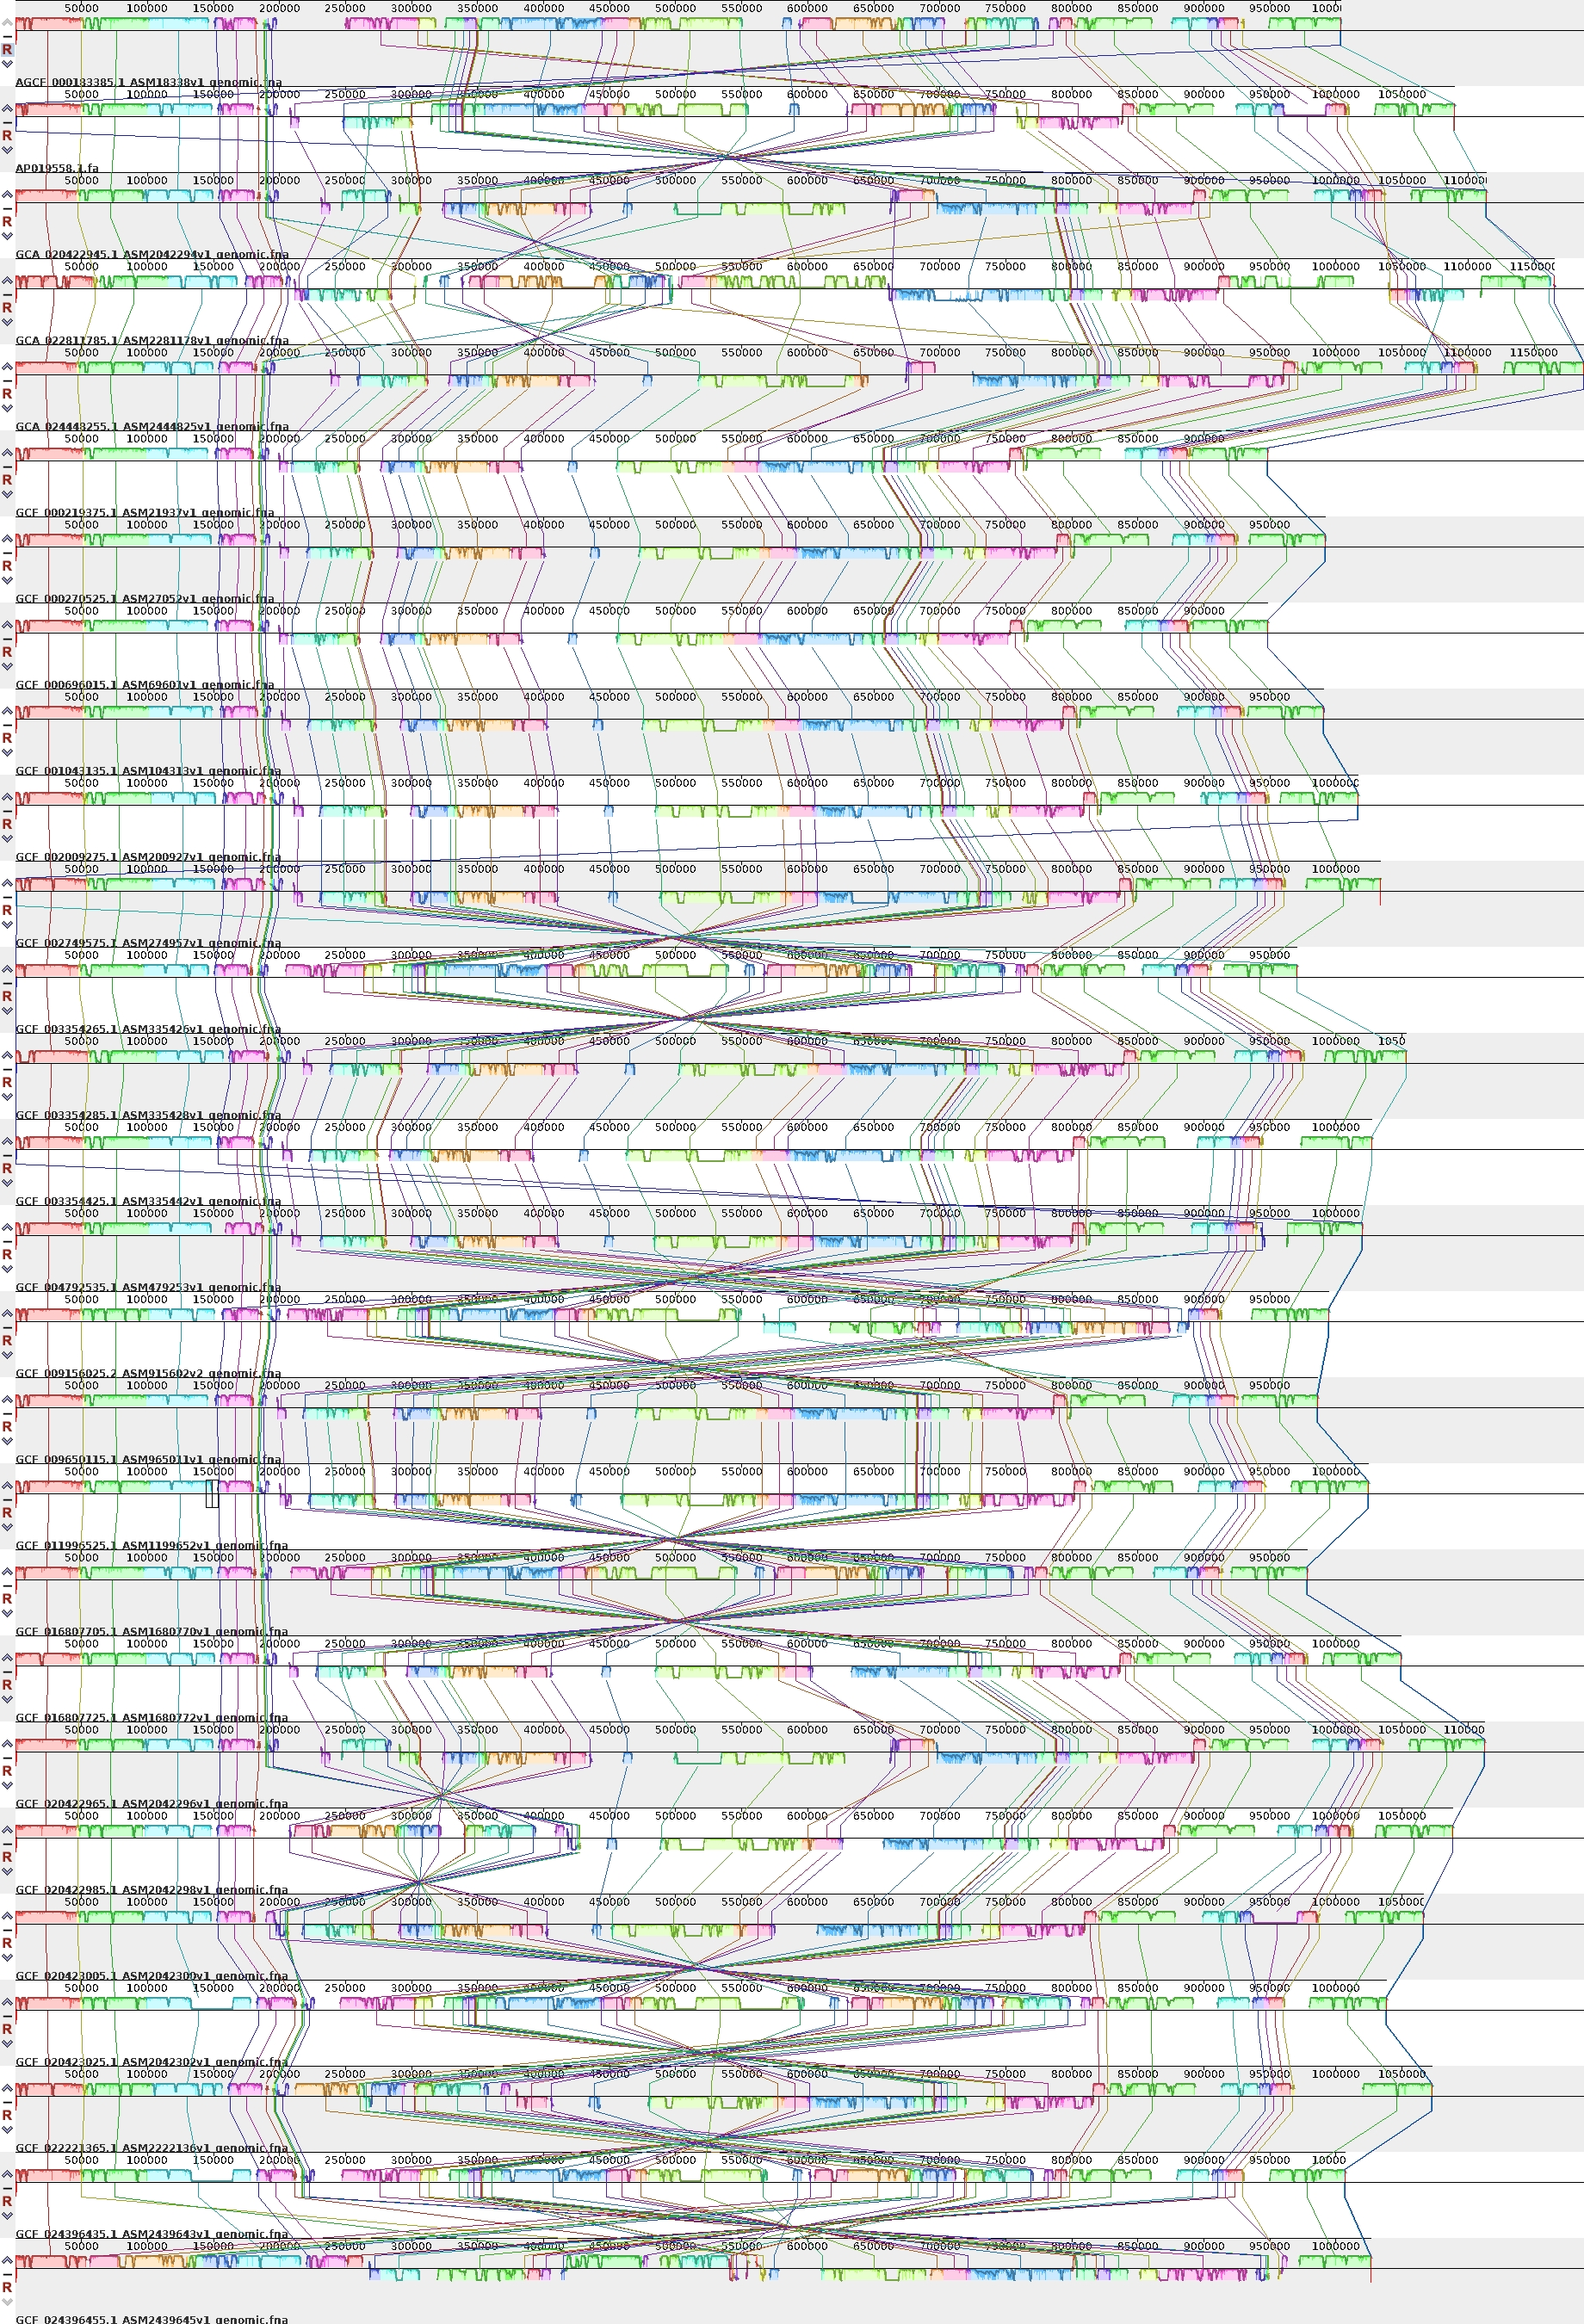

In [8]:
#check the genome alignment by Mauve
from IPython import display
display.Image("./27bovis_mauve_alignment.jpg")

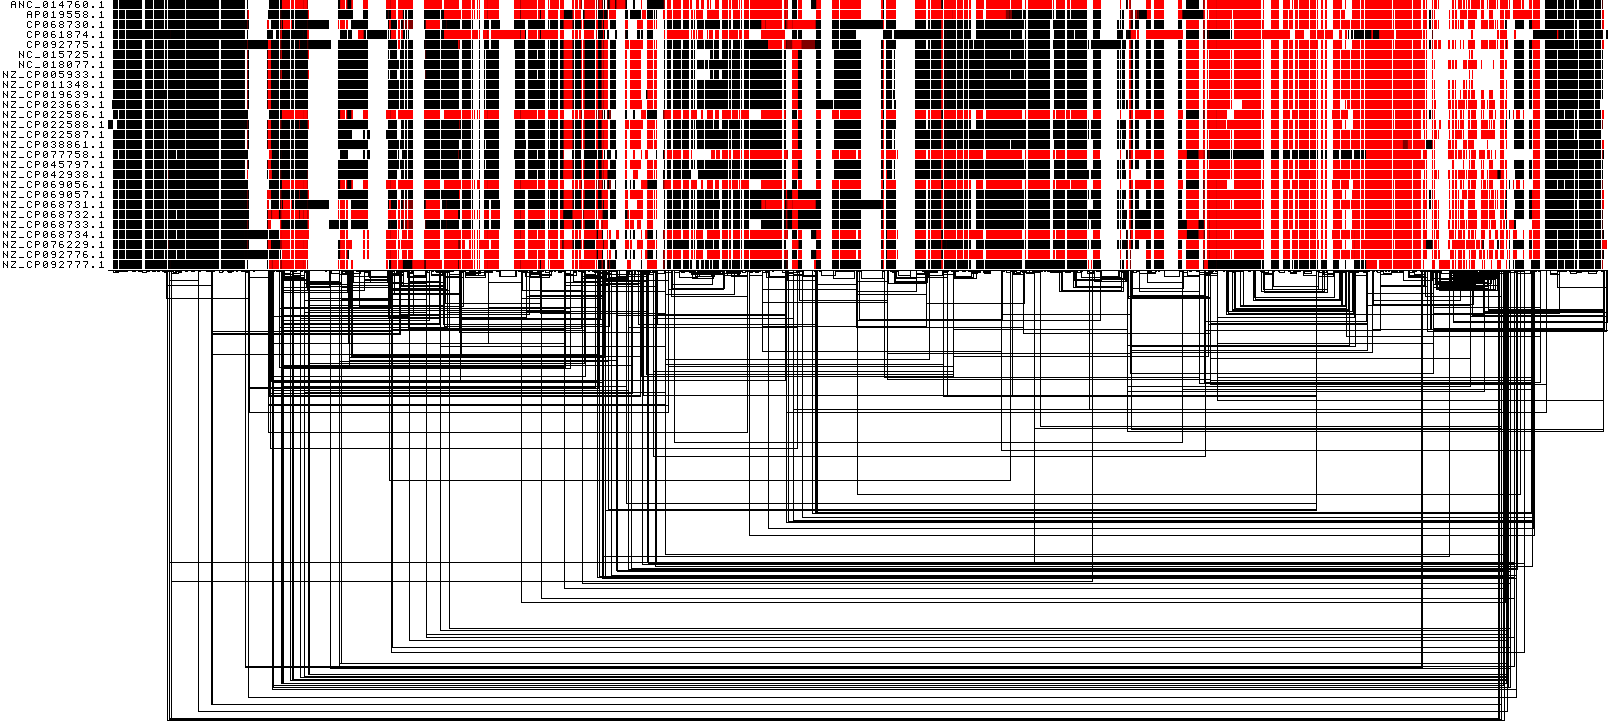

In [9]:
display.Image("./27bovies.fa.46961ed.417fcdf.1698653.smooth.final.og.viz_inv_multiqc.png")

In [13]:
%cd ./../27bovis_1_10K0.95/

/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/27bovis_1_10K0.95


In [14]:
%cat index_27genomes.sh

#!/usr/bin/bash

module load vg/1.41.0 


vg mod -t 32 -X 256 27bovies.10k95.gfa > 27bovies.10k95_chopped.vg
vg index -t 46 -x 27bovies.10k95_chopped.xg 27bovies.10k95_chopped.vg
vg prune -t 48 -k 45 27bovies.10k95_chopped.vg >27bovies.10k95_pruned.vg
vg index -t 48 -b /tmp -p -x 27bovies.10k95_pruned.xg -g 27bovies.10k95_pruned.gcsa 27bovies.10k95_pruned.vg


vg index -b ./temp -t 48 -p -x 27bovies.10k95_chopped.xg -g 27bovies.10k95_chopped.gcsa -k 16 27bovies.10k95_chopped.vg






#index using two ways, chopped graph into 256 bp doestn't affect anything in the graph
1:chopped but no prune
2:chopped and pruned, index to get .gcsa 

In [1]:
!pwd

/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis


In [22]:
%cd build_index

[Errno 2] No such file or directory: 'build_index'
/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/build_index


In [6]:
!cat index_3bovis_chopped_pruned.sh 

#!/usr/bin/bash

module load vg/1.41.0 


vg mod -t 32 -X 256 3bovis_restart3_10k95.gfa > 3bovis_restart3_10k95_chopped.vg
vg index -t 46 -b /tmp -p -x 3bovis_restart3_10k95_chopped.xg -g 3bovis_restart3_10k95_chopped.gcsa -k 16  3bovis_restart3_10k95_chopped.vg


vg prune -t 48 -k 45 3bovis_restart3_10k95_chopped.vg >3bovis_restart3_10k95_pruned.vg
vg index -t 48 -b /tmp -p -x 3bovis_restart3_10k95_pruned.xg -g 3bovis_restart3_10k95_pruned.gcsa 3bovis_restart3_10k95_pruned.vg


#vg index -b ./temp -t 48 -p -x NM_26_2_restart_2_256.xg -g NM_26_2_restart_2_256.gcsa -k 16 NM_26_2_restart_2_256.vg






In [7]:
%cd ..

/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis


In [9]:
!cat map2graph.sh

#!/bin/bash
module load vg/1.41.0

data=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/NGS_data/sra/*_1.fastq.gz
input_folder=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/NGS_data/sra
output=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/map2graph
index=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/build_index/3bovis_restart3_10k95_256.gcsa
basename=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/build_index/3bovis_restart3_10k95_256

for f in $data
do
x=$(basename $f _1.fastq.gz)
echo ${x}

read1=${x}_1.fastq.gz
read2=$(echo $read1|sed 's/_1.fastq.gz/_2.fastq.gz/')

echo $read2
vg map -t 20  -d $basename -g $index  -f $input_folder/$read1 -f $input_folder/$read2 -N $x  > $output/${x}vgmap_3bovis.gam
vg stats -a  $output/${x}vgmap_3bovis.gam  >$output/${x}vgmap_3bovis_stats

done 


map NGS data to graph based prunned index file, but need the orignal graph, so make sure the base name is consistant to the original graph

map to orignal graph but using prunned index 

In [10]:
!cat map2graph3.sh

#!/bin/bash
module load vg/1.41.0

data=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/NGS_data/sra/*_1.fastq.gz
input_folder=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/NGS_data/sra
output=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/map2graph3
index=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/build_index/3bovis_restart3_10k95_pruned.gcsa
basename=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/build_index/3bovis_restart3_10k95_256

for f in $data
do
x=$(basename $f _1.fastq.gz)
echo ${x}

read1=${x}_1.fastq.gz
read2=$(echo $read1|sed 's/_1.fastq.gz/_2.fastq.gz/')

echo $read2
vg map -t 20  -d $basename -g $index  -f $input_folder/$read1 -f $input_folder/$read2 -N $x  > $output/${x}vgmap_pru_orxg_3bovis.gam
vg stats -a  $output/${x}vgmap_pru_orxg_3bovis.gam  >$output/${x}vgmap_pru_orxg_3bovis_stats

done 


In [12]:
%cd build_index/

/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/build_index


In [14]:
!cat generate_snarls.sh

#!/bin/bash 

module load vg/1.41.0

vg snarls 3bovis_restart3_10k95_256.xg > 3bovis_restart3_10k95_256.xg.snarls

vg snarls 3bovis_restart3_10k95_chopped.xg > 3bovis_restart3_10k95_chopped.xg.snarls

vg snarls 3bovis_restart3_10k95_pruned.xg > 3bovis_restart3_10k95_pruned.xg.snarls


In [15]:
%cd ..

/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis


#Genotyping 
1)using original xg and snarls for genotyping
2)using orignal xg, but pruned snarls for genotying 
3)map to orignal xg based on pruned index, but using original snarls for genotying

all worked, but the pruned on contains less variants

In [16]:
!cat variant_typing.sh 

#!/bin/bash

module load vg/1.41.0

data_gam=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/map2graph/*vgmap_3bovis.gam
input=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/map2graph
output=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/variant_typing
graph_xg=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/build_index/3bovis_restart3_10k95_256.xg
snarls_file=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/build_index/3bovis_restart3_10k95_256.xg.snarls



#compute snarls
vg snarls $graph_xg >$snarls_file

for f in $data_gam
do

x=$(basename $f vgmap_3bovis.gam)
echo ${x}


#Calculate the surpport reads ingoring mapping and base quality <5
vg pack -t 48 -x $graph_xg -g $input/${x}vgmap_3bovis.gam -Q 5 -o $output/${x}vgmap_3bovis_256_aln.pack

#call variant using the same coordinates and including reference calls (for following compare)
vg call -t 60 -m 3,

In [17]:
!cat variant_typing2.sh

#!/bin/bash

module load vg/1.41.0

data_gam=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/map2graph/*vgmap_3bovis.gam
input=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/map2graph
output=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/variant_typing
graph_xg=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/build_index/3bovis_restart3_10k95_256.xg
snarls_file=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/build_index/3bovis_restart3_10k95_256.xg/3bovis_restart3_10k95_256.xg.snarls
snarls_file_pruned=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/build_index/3bovis_restart3_10k95_pruned.xg.snarls


#compute snarls
vg snarls $graph_xg >$snarls_file

for f in $data_gam
do

x=$(basename $f vgmap_3bovis.gam)
echo ${x}


#Calculate the surpport reads ingoring mapping and base quality <5
#vg pack -t 48 -x $graph_xg -g $input/${x}vgmap

In [18]:
%cat variant_typing3.sh

#!/bin/bash

module load vg/1.41.0

data_gam=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/map2graph3/*vgmap_pru_orxg_3bovis.gam
input=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/map2graph3
output=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/variant_typing3
graph_xg=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/build_index/3bovis_restart3_10k95_256.xg
snarls_file=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/build_index/3bovis_restart3_10k95_256.xg.snarls
#snarls_file_pruned=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/build_index/3bovis_restart3_10k95_pruned.xg.snarls


#compute snarls
vg snarls $graph_xg >$snarls_file

for f in $data_gam
do

x=$(basename $f vgmap_pru_orxg_3bovis.gam)
echo ${x}


#Calculate the surpport reads ingoring mapping and base quality <5
vg pack -t 48 -x $graph_xg -g $input/${x}vgmap_pru_orx

call novel variant
it has to be based on original graph
the pruned one doesn't contain paths

In [19]:
!cat variant_nofilcall_allR_R10S3.sh 

#!/bin/bash

module load vg/1.41.0

data_gam=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/map2graph/*vgmap_3bovis.gam
input=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/map2graph
output=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/variant_nofilcall_allR_R10S3
graph_vg=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/build_index/3bovis_restart3_10k95_256.vg
#graph_xg=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/build_index/3bovis_restart3_10k95_256.xg


#compute snarls
#vg snarls $graph_xg >$output/${graph_xg}.snarls

for f in $data_gam
do 

x=$(basename $f vgmap_3bovis.gam)
echo ${x}


#Augment augment the graph with all variation from the GAM, saving to aug.vg
### augment the graph with all variation from the GAM 
### that implied by soft clips, saving to aug.vg
### *aug-gam contains the same reads as aln.gam but mapped to aug.vg

vg augment -t 4

In [20]:
!cat variant_nofilcall_allR_R10S3_3.sh

#!/bin/bash

module load vg/1.41.0

data_gam=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/map2graph3/*vgmap_pru_orxg_3bovis.gam
input=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/map2graph3
output=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/variant_nofilcall_allR_R10S3_3
graph_vg=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/build_index/3bovis_restart3_10k95_256.vg
#graph_xg=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/Mycoplasma_bovis/build_index/3bovis_restart3_10k95_256.xg


#compute snarls
#vg snarls $graph_xg >$output/${graph_xg}.snarls

for f in $data_gam
do 

x=$(basename $f vgmap_pru_orxg_3bovis.gam)
echo ${x}


#Augment augment the graph with all variation from the GAM, saving to aug.vg
### augment the graph with all variation from the GAM 
### that implied by soft clips, saving to aug.vg
### *aug-gam contains the same reads as aln.gam but mapped to a